In [1]:
import json
import pandas as pd

In [2]:
cluster_enrichment = pd.read_excel('gene_cluster_funk22.xlsx', sheet_name='(B) Cluster enrichment', header=1)

In [3]:
interphase_clusters = {'Ribosome biogenesis': [112,21,203,216],
 '40S Ribosome': [136, 66], 
 '60S Ribosome': [15, 23],
 'Translation initiation & tRNA ligases': [14],
 'General transcription factors, mRNA export': [8, 60],
 'RNA Polymerase': [45, 155, 199],
 'Protein degradation': [167, 106, 213, 200],
 'RNA processing': [145, 217, 157],
 'Spliceosome':[52, 110, 138, 215],
 'DNA replication': [195, 26],
 'DNA damage': [3, 13, 179],
 'Cell cycle': [95, 148, 218, 46],
 'Actin cytoskeleton & Adhesion': [29, 184],
 'Vesicle trafficking': [140, 54, 201]}

In [4]:
gene_dict = {key:[] for key in interphase_clusters.keys()}
for key, val in interphase_clusters.items():
    for i in val:
        gene_dict[key] = gene_dict[key] + list(cluster_enrichment.loc[cluster_enrichment['Interphase cluster']==i, 'Genes'])[0].split(', ')

# # manual modifications to correct for some gene functional clsuter misclassifications
# gene_dict['Cell cycle'].remove('RAD21')
# gene_dict['RNA degradation'].remove('nontargeting_32_3')
gene_dict['Cell cycle'] = [e for e in gene_dict['Cell cycle'] if e not in ['ANAPC11', 'ANAPC10', 'ANAPC2']]
# del gene_dict['Proteasome']

In [5]:
mitosis_cluster = {'Chromosome alignment': ['ACTR1A', 'ACTR10', 'ANAPC1', 'ANAPC2', 'ANAPC4', 'ANAPC5', 'ANAPC10', 'ANAPC11', 'CDC16', 'CDC20', 'CDC23',
                                            'CDC26', 'CDCA5', 'CENPC', 'CENPH', 'CENPI', 'CENPK', 'CENPL', 'CENPM', 'CENPN', 'CENPT', 'CENPW', 'DCTN2',
                                            'DCTN4', 'DCTN5', 'DYNC1H1', 'DYNC1I2', 'DYNLRB1', 'ESPL1', 'KIF18A', 'NAA50', 'NUF2', 'PAFAH1B1', 'RAD21',
                                            'SGO1', 'SKA1', 'SKA2', 'SKA3', 'SMC2', 'SMC4', 'SPC24', 'SPC25', 'SPDL1', 'TOP2A'],
                   'Spindle bipolarity': ['AURKA', 'CEP85', 'CEP192', 'ERH', 'GAK', 'KIF11', 'MYBL2', 'NEDD1', 'PLK4', 'PSMD1', 'PSMD3', 'PSMD7',
                                          'PSMD8', 'PSMD11', 'PSMD12', 'SASS6', 'STIL', 'TACC3', 'TPX2', 'TUBGCP2', 'TUBGCP3', 'TUBGCP6', 'ZNF335',
                                          'CKAP5', 'HAUS1', 'HAUS2', 'HAUS3', 'HAUS4', 'HAUS5', 'HAUS6', 'HAUS7', 'HAUS8'],
                   'Tubulin': ['CCT2', 'CCT3', 'CCT4', 'CCT5', 'CCT6A', 'CCT7', 'CCT8', 'TBCC', 'TCP1', 'TUBA1B', 'TUBA1C', 'TUBB'],
                #    'mRNA splicing': ['BRF2', 'BUD31', 'CDC5L', 'CDC27', 'ECD', 'EFTUD2', 'ESS2', 'IK', 'LSM2', 'LSM4', 'LSM5', 'LSM6', 'LSM7', 'LSM8',
                                    #  'MEPCE', 'PLRG1', 'PRPF4', 'PRPF6', 'PRPF8', 'PRPF19', 'PRPF31', 'PRPF38A', 'RBM39', 'RPSA', 'SAP30BP', 'SF3B3',
                                    #  'SF3B5', 'SF3B6', 'SMU1', 'SNIP1', 'SNRNP200', 'SNRPA1', 'SNRPB', 'SNRPD1', 'SNRPD2', 'SNRPD3', 'SNRPF', 'SNRPG',
                                    #  'SNU13', 'SNW1', 'SRSF3', 'TUT1', 'TXNL4A', 'U2AF1L5', 'U2AF1', 'UBL5', 'USPL1', 'WBP11', 'ZMAT2']
                                     }
gene_dict['DNA replication'] = list(set(gene_dict['DNA replication']+['CDC6', 'CDC7', 'CDC45', 'CNOT1', 'DDB1', 'DTL', 'DUX4', 'H3C14', 'H3C15', 'KRTAP2-2', 'KRTAP9-4', 'LRR1',
                                       'MCM10', 'MMS22L', 'MTBP', 'NBPF12', 'ORC1', 'ORC6', 'PCNA', 'PHF5A', 'POLA1', 'POLE', 'POLE2', 'PPIAL4A',
                                       'PRIM1', 'RPA1', 'RPA2', 'SKP2', 'TICRR', 'TONSL', 'TOPBP1', 'TRAIP', 'U2AF2']))
gene_dict.update(mitosis_cluster)

In [6]:
# This will hold all substrings
all_Genes = []

# Split each string on the comma and space, and extend all_substrings with the result
for genes in gene_dict.values():
    all_Genes.extend(genes)

In [7]:
def find_duplicates(lst):
    seen = set()
    duplicates = set()
    
    for item in lst:
        if item in seen:
            duplicates.add(item)
        else:
            seen.add(item)
    
    return list(duplicates)

duplicated = find_duplicates(all_Genes)

In [8]:
import copy

def remove_strings_from_dict(dictionary, target_strings):
    keys_to_update = set()
    dictionary_copy = copy.deepcopy(dictionary)
    # Identify keys which have any of the target strings
    for key, value_list in dictionary_copy.items():
        for target_string in target_strings:
            
            if target_string in value_list and key in list(interphase_clusters.keys()):
                keys_to_update.add(key)
    # Remove target strings from identified keys
    for key in keys_to_update:
        dictionary_copy[key] = [x for x in dictionary_copy[key] if x not in target_strings]

    return dictionary_copy

final_dict = remove_strings_from_dict(gene_dict, duplicated)

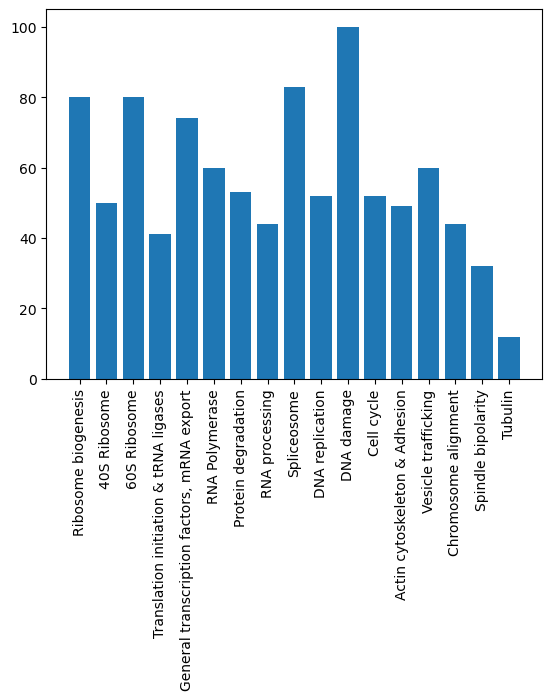

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.bar(list(final_dict.keys()), [len(lst) for lst in final_dict.values()])
plt.xticks(rotation=90)
plt.show()

In [19]:
len([sublist for key in final_dict for sublist in final_dict[key]])==len(set([sublist for key in final_dict for sublist in final_dict[key]]))

True

In [34]:
cluster_assignment = {}
for key, val in final_dict.items():
    for gene in val:
        cluster_assignment[gene] = key

with open('KEGG_modified_cluster.json', 'w') as file:
    json.dump(cluster_assignment, file)